## __Gradient Descent with Momentum__

Problem with the gradient descent algorithm:

- The progression of the search can fluctuate within the search space based on the gradient.
- This behavior can impede the progress of the search, particularly in optimization problems where the overall trend or shape of the search space is more valuable than specific gradients encountered along the way.

Momentum
- It serves as an extension to the gradient descent optimization algorithm, aiming to expedite the optimization process by incorporating historical information into the parameter update equation.
- This is achieved by considering the gradients encountered in previous updates.
- In this approach, an additional hyperparameter is introduced to govern the degree of historical momentum included in the update equation.


## Steps to Be Followed:
1.  Importing the required libraries
2.  Defining the objective function
3.  Defining the gradient descent algorithm


### Step 1: Importing the Required Libraries

- Import **numpy.asarray** to convert input data into an array
- Import **numpy.random.rand** to generate random numbers from a uniform distribution
- Import **numpy.random.seed** to set the seed for reproducible random number generation
- Import **numpy.arange** to create an array of values within a specified range
- Import **matplotlib.pyplot** that provides functions for creating plots and visualizations


In [1]:
import numpy as np
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from numpy import arange
from matplotlib import pyplot

### Step 2: Defining the Objective Function
- The function **objective** takes a single input parameter **x**.
- It returns the square of the input value as the output, representing the objective function.

In [2]:
# Define objective function = cost function
def objective(w):
    return w**2.0

### Step 3: Defining the Gradient Descent Algorithm

- You must calculate the square of **x**, representing the objective function.
- The derivative(x) function computes the derivative of x with respect to the objective function.
- The **gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)** function implements the gradient descent algorithm. It initializes a solution within the specified bounds and iteratively updates it based on the objective and derivative functions. The function also tracks and stores the solutions and their corresponding scores.
- The random seed is set to 4 using seed(4) to ensure reproducibility.
- The bounds variable defines the lower and upper bounds for the solution space.
- Parameters such as the number of iterations (n_iter), step size (step_size), and momentum (momentum) are specified.
- The **gradient_descent** function is called with the provided arguments, and the resulting solutions and scores are stored.
- An array of input values (inputs) is generated using **arange** within the defined bounds.
- The objective function values (results) are computed for the input values.
- The objective function curve is plotted using **pyplot.plot** with inputs on the x-axis and results on the y-axis.
- The optimization path is visualized by plotting the solutions and scores as red dots connected by lines using pyplot.plot.
- Finally, **pyplot.show()** is called to display the plot.

In [3]:
# compute the gradient
def derivative(w):
    return 2.0 * w

In [4]:
def gradient_descent(objective, derivative, bounds, n_iter, lrate, momentum):
    weights, scores = list(), list()

    # Initialize the weight
    weight = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])

    # Initialize the moving average
    moving_average = derivative(weight)

    for i in range(n_iter):

        # Compute gradient
        gradient = derivative(weight)

        # Update moving average of the gradients; beta is called momentum
        moving_average = momentum * moving_average + (1-momentum) * gradient

        # Update the weight
        weight = weight - lrate * moving_average

        # Optionally, evealuate the objective at the updated weight and store the updated weight in a list
        weight_eval = objective(weight)
        weights.append(weight)
        scores.append(weight_eval)
        # End of the optional part

        print('>%d f(%s) = %.5f' % (i, weight, weight_eval))
    return [weights, scores]

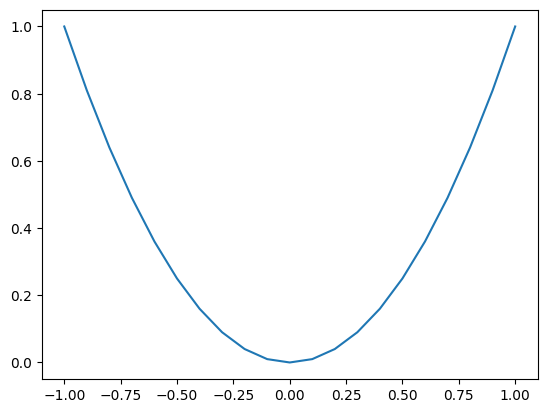

>0 f([0.74724774]) = 0.55838
>1 f([0.58658948]) = 0.34409
>2 f([0.45626947]) = 0.20818
>3 f([0.35329574]) = 0.12482
>4 f([0.27294222]) = 0.07450
>5 f([0.21062425]) = 0.04436
>6 f([0.16244147]) = 0.02639
>7 f([0.12524483]) = 0.01569
>8 f([0.09655156]) = 0.00932
>9 f([0.07442636]) = 0.00554
>10 f([0.05736911]) = 0.00329
>11 f([0.04422026]) = 0.00196
>12 f([0.03408477]) = 0.00116
>13 f([0.02627225]) = 0.00069
>14 f([0.02025038]) = 0.00041
>15 f([0.01560877]) = 0.00024
>16 f([0.01203106]) = 0.00014
>17 f([0.0092734]) = 0.00009
>18 f([0.00714782]) = 0.00005
>19 f([0.00550945]) = 0.00003
>20 f([0.00424662]) = 0.00002
>21 f([0.00327324]) = 0.00001
>22 f([0.00252298]) = 0.00001
>23 f([0.00194468]) = 0.00000
>24 f([0.00149894]) = 0.00000
>25 f([0.00115536]) = 0.00000
>26 f([0.00089054]) = 0.00000
>27 f([0.00068642]) = 0.00000
>28 f([0.00052908]) = 0.00000
>29 f([0.00040781]) = 0.00000


/var/folders/20/3j4rdyrn6dz8rtgnw30ydg800000gn/T/ipykernel_15451/2280438976.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, weight, weight_eval))


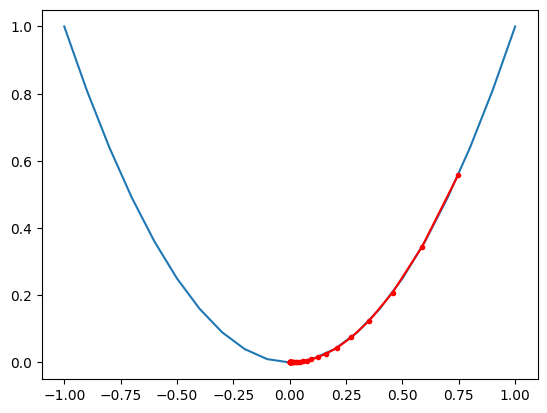

In [5]:
seed(4)

bounds = asarray([[-1.0, 1.0]])

n_iter = 30

step_size = 0.1
momentum = 0.3

inputs = arange(bounds[0,0], bounds[0,1] + 0.1, 0.1)
results = objective(inputs)
pyplot.plot(inputs, results)
pyplot.show()

solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
pyplot.plot(inputs, results)
pyplot.plot(solutions, scores, '.-', color='red')
pyplot.show()

## Final weight

In [6]:
solutions[-1]

array([0.00040781])

**Observation**
- The code snippet visualizes the convergence of the gradient descent algorithm by plotting the objective function and the solutions found at each iteration, providing a graphical representation of the optimization process.